In [135]:
# No es el CMYK verdadero, es un CMYK de W3School, el verdadero se obtiene al transformar esta escala en RGB y de ahi a CMYK
def cmyk(cpt):
    cmyk_matrix = np.ndarray((len(cpt), 4), int)
    # Iteramos por las filas de tabla
    for i in range(len(cpt)):
        cmyk_array = [0, 0, 0, 0]
        absent_value = cpt[i][0]
        max_index = 1

        # Iterate through non-absent states to determine the index of max color
        for j in range(1, 4, 1):
            if cpt[i][j] > cpt[i][max_index]:
                max_index = j

        # Determine the max_color value
        max_color = 100 - (absent_value * 100)

        # Iterate through non-absent states to determine their color
        for j in range(1, 4, 1):
            if j == max_index:
                cmyk_array[j-1] = max_color
            else:
                color = (cpt[i][j] * max_color) / cpt[i][max_index]  # Regla de 3 para obtener la proporcion
                cmyk_array[j-1] = color

        # Add the color array to the matrix
        cmyk_matrix[i] = cmyk_array

    return cmyk_matrix

def cmyk_to_hex_matrix(cmyk_matrix):
    hex_array = []
    for i in range(0, len(cmyk_matrix)):
        cmyk_array = cmyk_matrix[i]
        c = cmyk_array[1]
        m = cmyk_array[2]
        y = cmyk_array[0]
        k = cmyk_array[3]
        r = 255*(1.0-(c+k)/float(100))
        g = 255*(1.0-(m+k)/float(100))
        b = 255*(1.0-(y+k)/float(100))
        rgb = (int(r),int(g),int(b))
        hex = '#%02x%02x%02x' % rgb
        hex_array.append(hex)
    return np.asarray(hex_array)


In [136]:
import pandas
import numpy as np

# Cargamos las CPTs de cada uno de los genes para el cluster correspondiente en forma de pandas DF (uno por cada cluster)
marginals = pandas.read_csv("heatmap_cpts/marginals.csv").values
cluster_1 = pandas.read_csv("heatmap_cpts/cpts_1.csv").values
cluster_2 = pandas.read_csv("heatmap_cpts/cpts_2.csv").values
cluster_3 = pandas.read_csv("heatmap_cpts/cpts_3.csv").values
cluster_4 = pandas.read_csv("heatmap_cpts/cpts_4.csv").values
cluster_5 = pandas.read_csv("heatmap_cpts/cpts_5.csv").values
cluster_6 = pandas.read_csv("heatmap_cpts/cpts_6.csv").values
cluster_7 = pandas.read_csv("heatmap_cpts/cpts_7.csv").values
cluster_8 = pandas.read_csv("heatmap_cpts/cpts_8.csv").values
cluster_9 = pandas.read_csv("heatmap_cpts/cpts_9.csv").values

# Generamos los vectores de colores para mostrarlos en forma de tabla
marginal_colors = cmyk_to_hex_matrix(cmyk(marginals))
cluster_1_colors = cmyk_to_hex_matrix(cmyk(cluster_1))
cluster_2_colors = cmyk_to_hex_matrix(cmyk(cluster_2))
cluster_3_colors = cmyk_to_hex_matrix(cmyk(cluster_3))
cluster_4_colors = cmyk_to_hex_matrix(cmyk(cluster_4))
cluster_5_colors = cmyk_to_hex_matrix(cmyk(cluster_5))
cluster_6_colors = cmyk_to_hex_matrix(cmyk(cluster_6))
cluster_7_colors = cmyk_to_hex_matrix(cmyk(cluster_7))
cluster_8_colors = cmyk_to_hex_matrix(cmyk(cluster_8))
cluster_9_colors = cmyk_to_hex_matrix(cmyk(cluster_9))

# Generamos un dataFrame con los colores de las CPTs de los genes
df = pandas.DataFrame()
df.insert(loc = 0, column="Marginal", value=marginal_colors)
df.insert(loc = 1, column="Cluster_1", value=cluster_1_colors)
df.insert(loc = 2, column="Cluster_2", value=cluster_2_colors)
df.insert(loc = 3, column="Cluster_3", value=cluster_3_colors)
df.insert(loc = 4, column="Cluster_4", value=cluster_4_colors)
df.insert(loc = 5, column="Cluster_5", value=cluster_5_colors)
df.insert(loc = 6, column="Cluster_6", value=cluster_6_colors)
df.insert(loc = 7, column="Cluster_7", value=cluster_7_colors)
df.insert(loc = 8, column="Cluster_8", value=cluster_8_colors)
df.insert(loc = 9, column="Cluster_9", value=cluster_9_colors)

# gene names
gene_names_df = pandas.read_csv("heatmap_cpts/gene_names.csv")

# Transponemos el DF y le asignamos los nombres de los genes
df = df.transpose()
df.columns = gene_names_df.columns

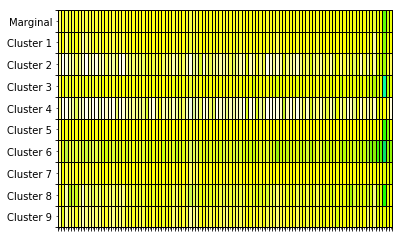

In [287]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
tb = Table(ax, bbox=[0,0,1,1])
nrows = 10
ncols = 100
nrows, ncols = data.shape
width, height = 1.0 / ncols, 1.0 / nrows


# Add cells
for (i,j), val in np.ndenumerate(df):
    color = df.values[i,j]
    tb.add_cell(i, j, width = width, height = height, loc='center', facecolor=color)

# Create table
table = ax.add_table(tb)

# Prepare Y axis
ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=11))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
minor_labels = ["Cluster 9","Cluster 8","Cluster 7","Cluster 6","Cluster 5","Cluster 4","Cluster 3","Cluster 2","Cluster 1","Marginal"]
# Genero los labels manualmente porque no tiene puto sentido como lo hace matplotlib
minor_labels_with_spaces_2 = ['','','Cluster 9', '', 'Cluster 8', '', 'Cluster 7', '', 'Cluster 6', '', 'Cluster 5', '', 'Cluster 4', '', 'Cluster 3', '', 'Cluster 2', '', 'Cluster 1', '', 'Marginal']
ax.set_yticklabels(minor_labels_with_spaces_2, minor=True)

# Prepare X axis
ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=101))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.xaxis.set_major_formatter(ticker.NullFormatter())

plt.show()

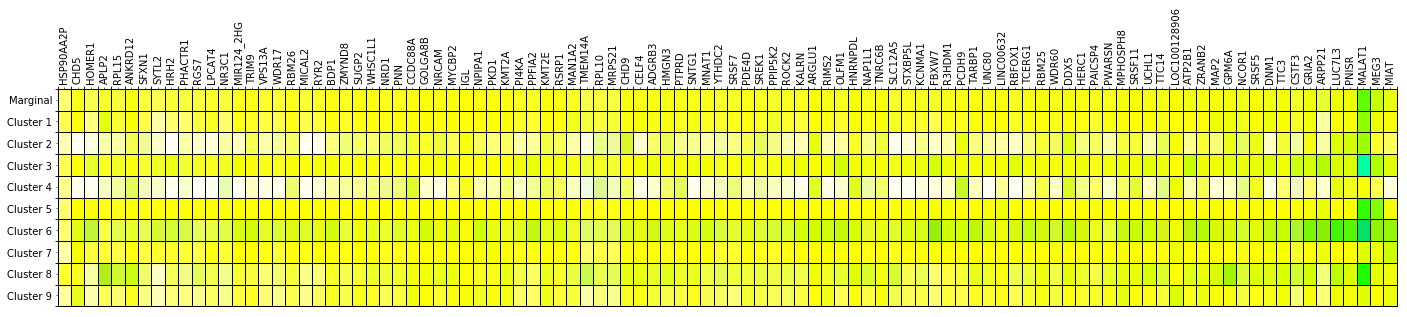

In [341]:
import matplotlib.ticker as ticker

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
fig = plt.figure(figsize=(24,4))
ax = plt.gca()
tb = Table(ax, bbox = [0,0,1,1])
nrows = 10
ncols = 100
nrows, ncols = data.shape
width, height = 1.0 / ncols, 1.0 / nrows


# Add cells
for (i,j), val in np.ndenumerate(df):
    color = df.values[i,j]
    tb.add_cell(i, j, width = width, height = height, loc='center', facecolor=color)

# Create table
table = ax.add_table(tb)

# Prepare Y axis
ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=11))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
minor_y_labels = ["Cluster 9","Cluster 8","Cluster 7","Cluster 6","Cluster 5","Cluster 4","Cluster 3","Cluster 2","Cluster 1","Marginal"]
minor_y_labels_with_spaces = [""]
for i in range(0, 20):
    if i%2==0:
        minor_y_labels_with_spaces.append("")
    else:
        j = int(i/2)
        minor_y_labels_with_spaces.append(minor_y_labels[j])
ax.set_yticklabels(minor_y_labels_with_spaces, minor=True)

# Prepare X axis
ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=101))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
# Generate the X axis labels
minor_x_labels = df.columns
minor_x_labels_with_spaces = [""]
for i in range(0, 200):
    if i%2==0:
        minor_x_labels_with_spaces.append("")
    else:
        j = int(i/2)
        minor_x_labels_with_spaces.append(minor_x_labels[j])
ax.set_xticklabels(minor_x_labels_with_spaces, minor=True, rotation=90)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

cols = list(range(10,101))
base_colors = []
for i in range(1,101):
    base_colors.append("w")

rows = ["marginal", "cluster_1"]

# Creamos la tabla
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellColours=base_colors,
                     rowLabels=rows,
                     colLabels=columns)

# Pintamos la tabla con los colores de la marginal
for i in range(0, 100):
    the_table._cells[(i, 0)].set_facecolor(marginal_colors[i])
for i in range(0, 100):
    the_table._cells[(i, 1)].set_facecolor(cluster_1_colors[i])
for i in range(0, 100):
    the_table._cells[(i, 2)].set_facecolor(cluster_2_colors[i])
for i in range(0, 100):
    the_table._cells[(i, 3)].set_facecolor(cluster_3_colors[i])
for i in range(0, 100):
    the_table._cells[(i, 4)].set_facecolor(cluster_4_colors[i])
for i in range(0, 100):
    the_table._cells[(i, 5)].set_facecolor(cluster_5_colors[i])
for i in range(0, 100):
    the_table._cells[(i, 6)].set_facecolor(cluster_6_colors[i])
for i in range(0, 100):
    the_table._cells[(i, 7)].set_facecolor(cluster_7_colors[i])
for i in range(0, 100):
    the_table._cells[(i, 8)].set_facecolor(cluster_8_colors[i])
for i in range(0, 100):
    the_table._cells[(i, 9)].set_facecolor(cluster_9_colors[i])
plt.show()

In [ ]:
from matplotlib.table import Table

fig, ax = plt.subplots()
ax.set_axis_off()
tb = Table(ax, bbox=[0,0,1,1])

In [262]:
minor_labels_with_spaces_2 = ['','','Cluster 9', '', 'Cluster 8', '', 'Cluster 7', '', 'Cluster 6', '', 'Cluster 5', '', 'Cluster 4', '', 'Cluster 3', '', 'Cluster 2', '', 'Cluster 1', '', 'Marginal', '']